<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_symptom_isolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

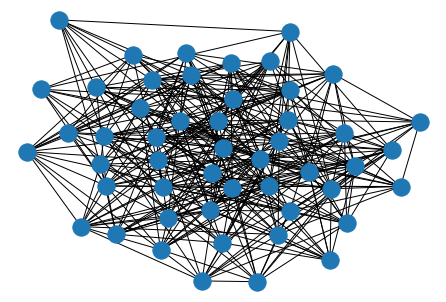

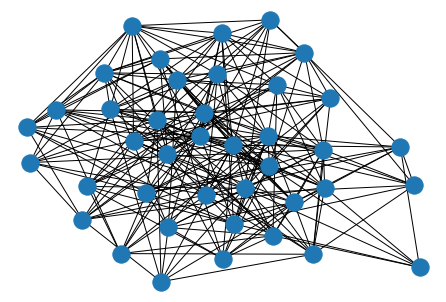

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
NUM_TESTS  = K/5 #Number of test available
PAS = 0.1 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic(i.e. Symptomatic)


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 1]
 [0 1 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 1 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
    Node[i*NN+j].append({'ISOLATED_S' : 0})
    Node[i*NN+j].append({'ISOLATED_I' : 0})   
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOL

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]
  Isolate = 0

  Agent[k].append({'Symptom' : Symptom, 'Isolate' : Isolate})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate]})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate], 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state]})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 3}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {2022: [0, 1, 0]}, {2870: [0, 1, 0]}, {7934: [0, 1, 0]}], 1: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {2102: [0, 1, 0]}, {2575: [0, 1, 0]}, {4303: [0, 0, 0]}, {8621: [0, 1, 0]}, {8853: [0, 1, 0]}], 2: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {527: [0, 1, 0]}, {1789: [0, 1, 0]}, {2053: [0, 1, 0]}, {5653: [0, 1, 0]}, {5852: [0, 1, 0]}], 3: [{'Viral_load': 0}, {'S': 6}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {1857: [0, 1, 0]}, {3420: [0, 1, 0]}, {5738: [0, 1, 0]}, {6363: [0, 0, 0]}, {6735: [0, 1, 0]}, {8746: [0, 1, 0]}], 4: [{'Viral_load': 0}, {'S': 6}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {2385: [0, 1, 0]}, {4963: [0, 1, 0]}, {6225: [0, 1, 0]}, {7263: [0, 1, 0]}, {7625: [0, 1, 0]}, {9803: [0, 1, 0]}], 5: [{'Viral_load': 0}, {'S': 2}, {'I': 0}, {'R': 0}, {'ISOLATED_S

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1, num_tests=K):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_I' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(6,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id][0] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id][0] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id][0] == 2:
            Node_next[nex][3]['R']+=1

          if Node[cur][agent][a_id][2] == 1:
            if Node[cur][agent][a_id][0] == 0:
              Node_next[nex][4]['ISOLATED_S']+=1
            elif Node[cur][agent][a_id][0] == 1:
              Node_next[nex][5]['ISOLATED_I']+=1

          
          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(6,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:   #Time-steps of 4 to get cured(I -> R)
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 

    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(6,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if num_tests > 0:
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] == 1:
              if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
                if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 0:
                  Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1
                  num_tests=num_tests - 1
              elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
                if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 0:
                  Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1
                  num_tests=num_tests - 1  
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next,num_tests

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  count_ISOLATED_S=0
  count_ISOLATED_I=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    count_ISOLATED_S+=Node[i][4]['ISOLATED_S']
    count_ISOLATED_I+=Node[i][5]['ISOLATED_I']
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,count_ISOLATED_S,count_ISOLATED_I,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 494, 493, 491, 489, 488, 488, 487, 487, 487, 482, 481, 481, 481, 481, 480, 478, 478, 478, 478, 478]
[179, 343, 1348, 1915, 2325, 2761, 2432, 2619, 2855, 3080, 3167, 3053, 2757, 2330, 1854, 1421, 1069, 783, 565, 410, 269, 176, 121, 76, 47, 32, 19, 13, 8, 6, 6, 5, 4, 2, 1, 6, 6, 6, 6, 1, 1, 3, 3, 3, 2, 0]
[0, 0, 0, 0, 179, 343, 1348, 1915, 2504, 3104, 3780, 4534, 5359, 6184, 6947, 7587, 8116, 8514, 8801, 9008, 9185, 9297, 9366, 9418, 9454, 9473, 9487, 9494, 9501, 9505, 9506, 9507, 9509, 9511, 9512, 9512, 9513, 9513, 9513, 9518, 9519, 9519, 9519, 9519, 9520, 9522]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 546

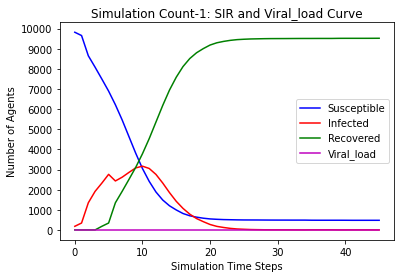

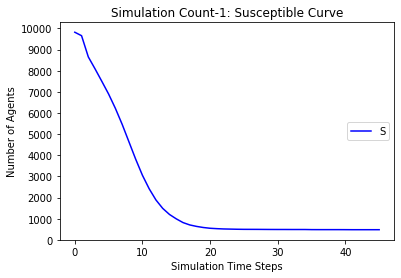

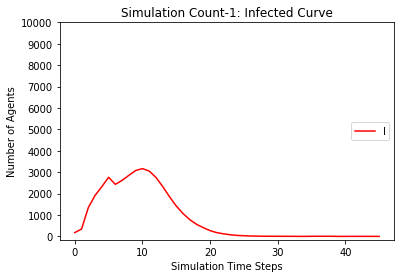

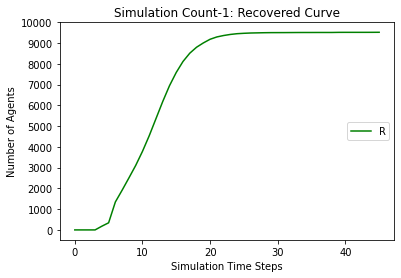

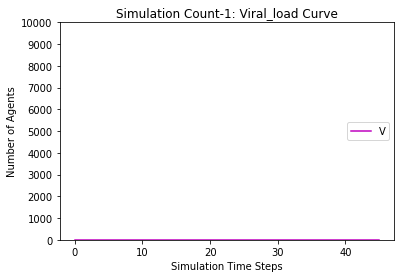

[9821, 9638, 8597, 7956, 7365, 6731, 5952, 5121, 4283, 3488, 2754, 2106, 1575, 1206, 975, 800, 711, 643, 581, 540, 515, 502, 490, 483, 473, 469, 467, 467, 467, 467, 467]
[179, 362, 1403, 2044, 2456, 2907, 2645, 2835, 3082, 3243, 3198, 3015, 2708, 2282, 1779, 1306, 864, 563, 394, 260, 196, 141, 91, 57, 42, 33, 23, 16, 6, 2, 0]
[0, 0, 0, 0, 179, 362, 1403, 2044, 2635, 3269, 4048, 4879, 5717, 6512, 7246, 7894, 8425, 8794, 9025, 9200, 9289, 9357, 9419, 9460, 9485, 9498, 9510, 9517, 9527, 9531, 9533]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 494, 493, 491, 489, 488, 488, 487, 487, 487, 482, 481, 481, 481, 481, 480, 478, 478, 478, 478, 478], [9821, 9638, 8597, 7956, 7365, 6731, 5952, 5121, 4283, 3488, 2754, 2106, 1575, 1206, 97

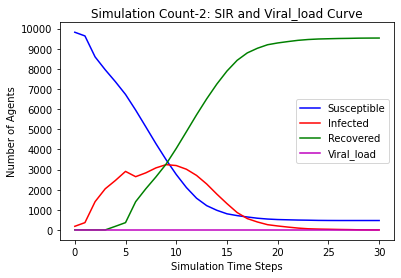

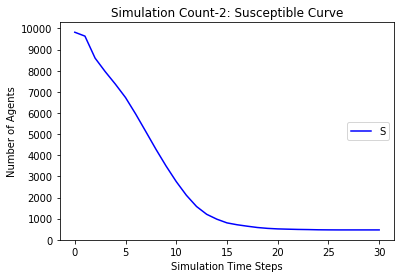

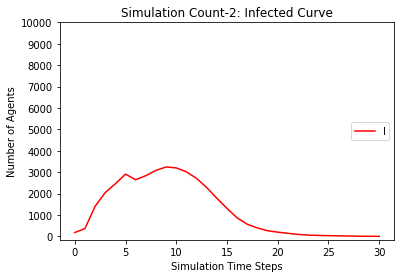

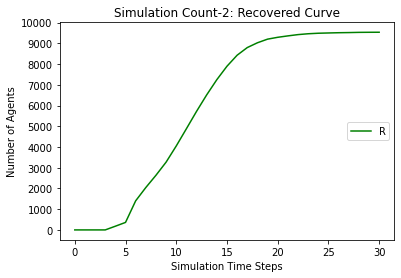

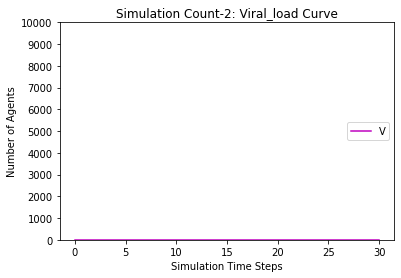

[9821, 9622, 8659, 8047, 7479, 6880, 6166, 5387, 4550, 3662, 2890, 2228, 1719, 1326, 1071, 883, 739, 652, 578, 545, 518, 501, 488, 476, 465, 454, 450, 447, 446, 446, 446, 446, 446]
[179, 378, 1341, 1953, 2342, 2742, 2493, 2660, 2929, 3218, 3276, 3159, 2831, 2336, 1819, 1345, 980, 674, 493, 338, 221, 151, 90, 69, 53, 47, 38, 29, 19, 8, 4, 1, 0]
[0, 0, 0, 0, 179, 378, 1341, 1953, 2521, 3120, 3834, 4613, 5450, 6338, 7110, 7772, 8281, 8674, 8929, 9117, 9261, 9348, 9422, 9455, 9482, 9499, 9512, 9524, 9535, 9546, 9550, 9553, 9554]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 494, 493, 491, 489, 488, 488, 487, 487, 487, 482, 481, 481, 481, 481, 480, 478, 478, 478, 478, 478], [9821, 9638, 8597, 7956, 7365, 6731, 5952, 5121

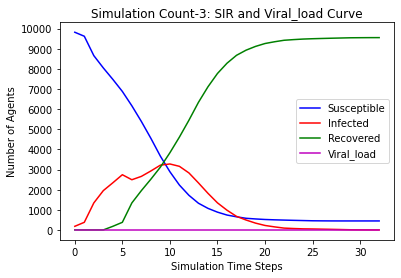

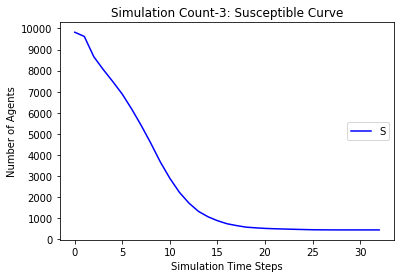

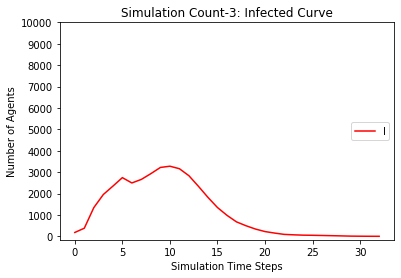

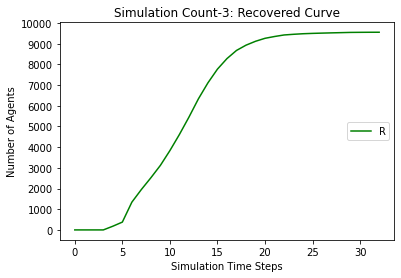

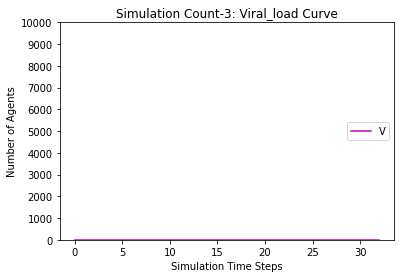

[9821, 9642, 8563, 7982, 7444, 6848, 6151, 5375, 4541, 3698, 2963, 2301, 1760, 1353, 1073, 857, 720, 637, 595, 559, 532, 518, 510, 508, 506, 505, 505, 504, 501, 497, 497, 496, 492, 492, 492, 492, 492]
[179, 358, 1437, 2018, 2377, 2794, 2412, 2607, 2903, 3150, 3188, 3074, 2781, 2345, 1890, 1444, 1040, 716, 478, 298, 188, 119, 85, 51, 26, 13, 5, 4, 5, 8, 8, 8, 9, 5, 5, 4, 0]
[0, 0, 0, 0, 179, 358, 1437, 2018, 2556, 3152, 3849, 4625, 5459, 6302, 7037, 7699, 8240, 8647, 8927, 9143, 9280, 9363, 9405, 9441, 9468, 9482, 9490, 9492, 9494, 9495, 9495, 9496, 9499, 9503, 9503, 9504, 9508]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 494, 493, 491, 489, 488, 488, 487, 487, 487, 482, 481, 481, 481, 481, 480,

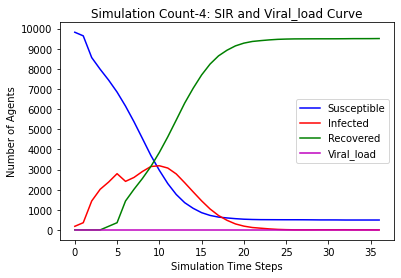

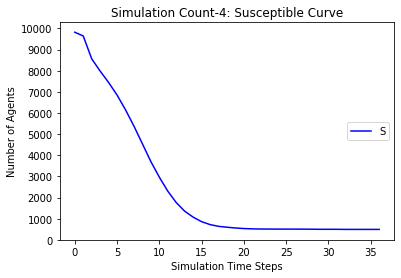

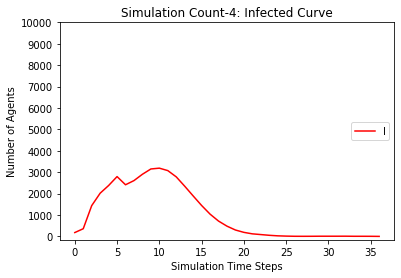

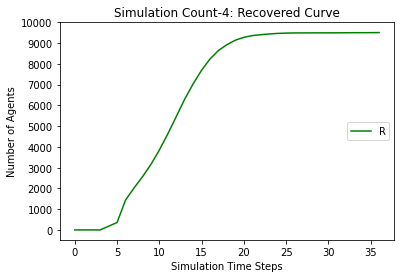

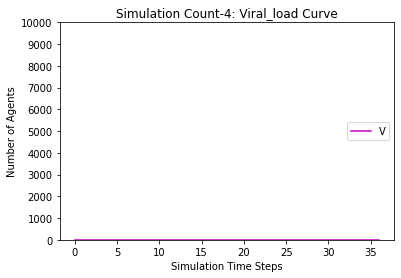

[9821, 9652, 8643, 8032, 7412, 6855, 6205, 5472, 4678, 3856, 3083, 2378, 1790, 1379, 1075, 867, 728, 647, 582, 547, 523, 498, 490, 481, 475, 474, 469, 466, 465, 465, 465, 463, 461, 461, 459, 459, 459, 459, 459]
[179, 348, 1357, 1968, 2409, 2797, 2438, 2560, 2734, 2999, 3122, 3094, 2888, 2477, 2008, 1511, 1062, 732, 493, 320, 205, 149, 92, 66, 48, 24, 21, 15, 10, 9, 4, 3, 4, 4, 6, 4, 2, 2, 0]
[0, 0, 0, 0, 179, 348, 1357, 1968, 2588, 3145, 3795, 4528, 5322, 6144, 6917, 7622, 8210, 8621, 8925, 9133, 9272, 9353, 9418, 9453, 9477, 9502, 9510, 9519, 9525, 9526, 9531, 9534, 9535, 9535, 9535, 9537, 9539, 9539, 9541]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 494, 493, 491, 489, 488, 488, 487

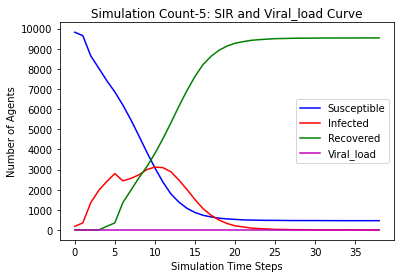

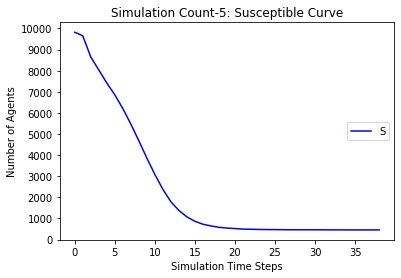

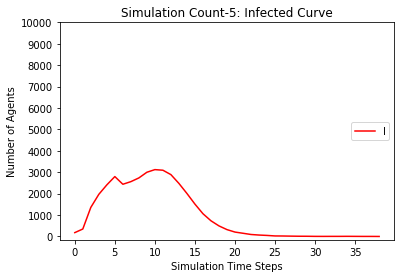

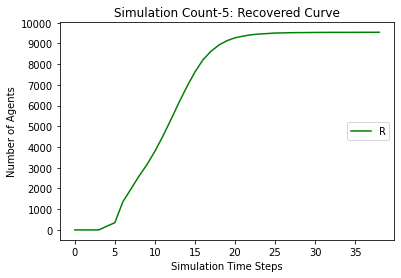

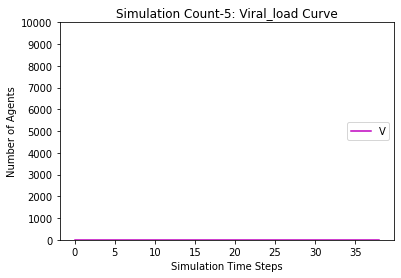

[9821, 9644, 8689, 8047, 7451, 6836, 6083, 5254, 4402, 3576, 2824, 2124, 1602, 1212, 958, 796, 693, 612, 564, 516, 493, 478, 467, 464, 464, 463, 459, 459, 457, 457, 456, 456, 456, 451, 451, 451, 450, 450, 450, 450, 450]
[179, 356, 1311, 1953, 2370, 2808, 2606, 2793, 3049, 3260, 3259, 3130, 2800, 2364, 1866, 1328, 909, 600, 394, 280, 200, 134, 97, 52, 29, 15, 8, 5, 7, 6, 3, 3, 1, 6, 5, 5, 6, 1, 1, 1, 0]
[0, 0, 0, 0, 179, 356, 1311, 1953, 2549, 3164, 3917, 4746, 5598, 6424, 7176, 7876, 8398, 8788, 9042, 9204, 9307, 9388, 9436, 9484, 9507, 9522, 9533, 9536, 9536, 9537, 9541, 9541, 9543, 9543, 9544, 9544, 9544, 9549, 9549, 9549, 9550]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 

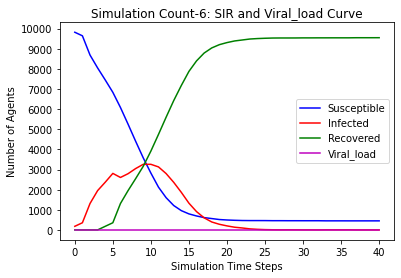

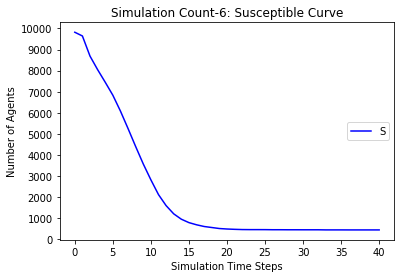

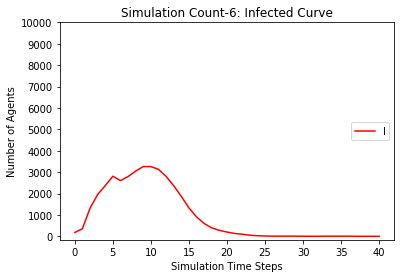

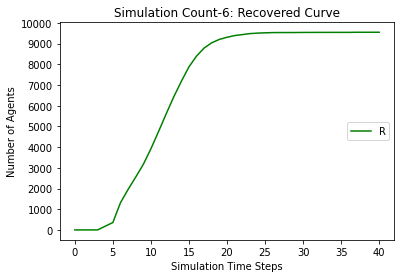

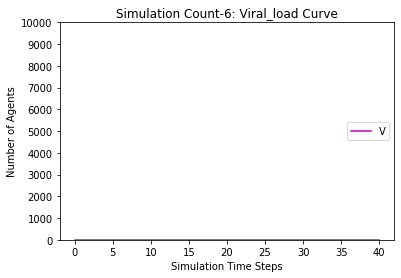

[9821, 9639, 8686, 8019, 7384, 6724, 5994, 5200, 4386, 3609, 2827, 2150, 1624, 1229, 971, 768, 645, 578, 538, 515, 498, 490, 476, 468, 462, 460, 450, 447, 443, 441, 440, 439, 439, 438, 438, 434, 434, 434, 434, 434]
[179, 361, 1314, 1981, 2437, 2915, 2692, 2819, 2998, 3115, 3167, 3050, 2762, 2380, 1856, 1382, 979, 651, 433, 253, 147, 88, 62, 47, 36, 30, 26, 21, 19, 19, 10, 8, 4, 3, 2, 5, 5, 4, 4, 0]
[0, 0, 0, 0, 179, 361, 1314, 1981, 2616, 3276, 4006, 4800, 5614, 6391, 7173, 7850, 8376, 8771, 9029, 9232, 9355, 9422, 9462, 9485, 9502, 9510, 9524, 9532, 9538, 9540, 9550, 9553, 9557, 9559, 9560, 9561, 9561, 9562, 9562, 9566]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 494, 493, 491, 

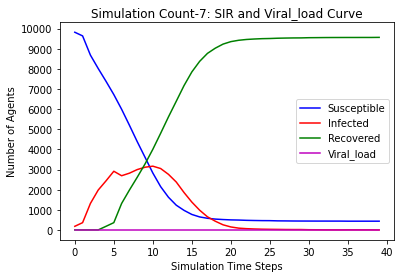

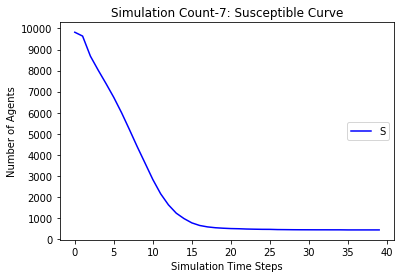

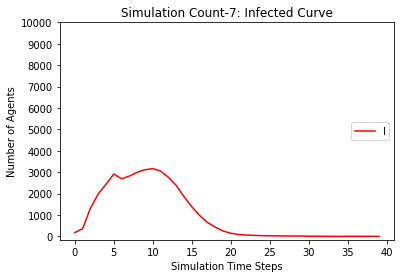

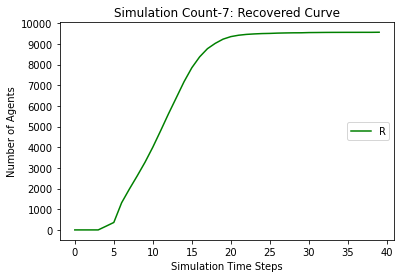

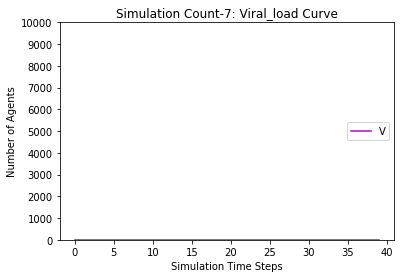

[9821, 9655, 8672, 8091, 7511, 6886, 6214, 5471, 4626, 3773, 3023, 2352, 1775, 1352, 1048, 850, 718, 633, 574, 527, 489, 464, 451, 439, 433, 430, 428, 428, 428, 428, 428]
[179, 345, 1328, 1909, 2310, 2769, 2458, 2620, 2885, 3113, 3191, 3119, 2851, 2421, 1975, 1502, 1057, 719, 474, 323, 229, 169, 123, 88, 56, 34, 23, 11, 5, 2, 0]
[0, 0, 0, 0, 179, 345, 1328, 1909, 2489, 3114, 3786, 4529, 5374, 6227, 6977, 7648, 8225, 8648, 8952, 9150, 9282, 9367, 9426, 9473, 9511, 9536, 9549, 9561, 9567, 9570, 9572]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 494, 493, 491, 489, 488, 488, 487, 487, 487, 482, 481, 481, 481, 481, 480, 478, 478, 478, 478, 478], [9821, 9638, 8597, 7956, 7365, 6731, 5952, 5121, 4283, 3488, 2754, 2106, 1575, 1206,

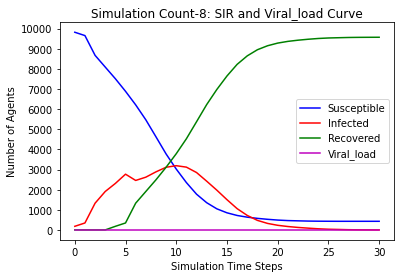

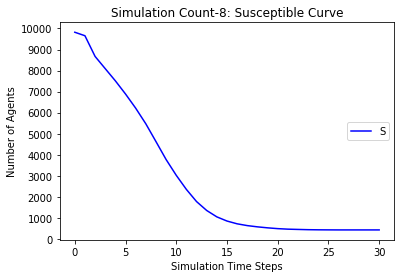

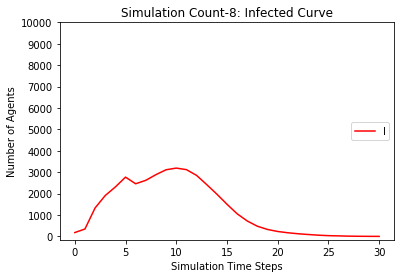

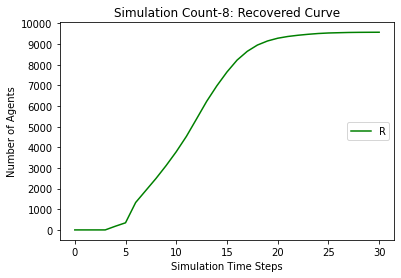

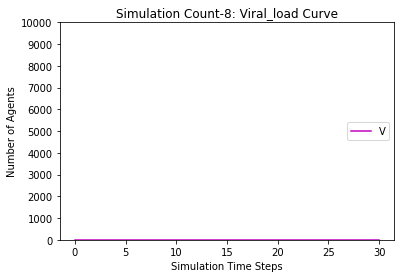

[9821, 9654, 8627, 8032, 7437, 6855, 6193, 5408, 4551, 3737, 3003, 2330, 1809, 1415, 1091, 907, 776, 694, 626, 575, 546, 526, 514, 505, 501, 499, 498, 498, 498, 498, 498]
[179, 346, 1373, 1968, 2384, 2799, 2434, 2624, 2886, 3118, 3190, 3078, 2742, 2322, 1912, 1423, 1033, 721, 465, 332, 230, 168, 112, 70, 45, 27, 16, 7, 3, 1, 0]
[0, 0, 0, 0, 179, 346, 1373, 1968, 2563, 3145, 3807, 4592, 5449, 6263, 6997, 7670, 8191, 8585, 8909, 9093, 9224, 9306, 9374, 9425, 9454, 9474, 9486, 9495, 9499, 9501, 9502]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 494, 493, 491, 489, 488, 488, 487, 487, 487, 482, 481, 481, 481, 481, 480, 478, 478, 478, 478, 478], [9821, 9638, 8597, 7956, 7365, 6731, 5952, 5121, 4283, 3488, 2754, 2106, 1575, 1206, 

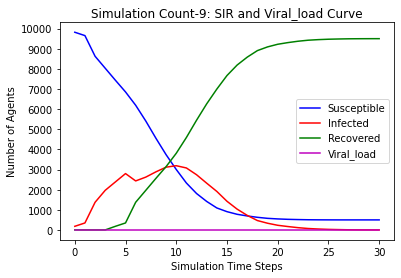

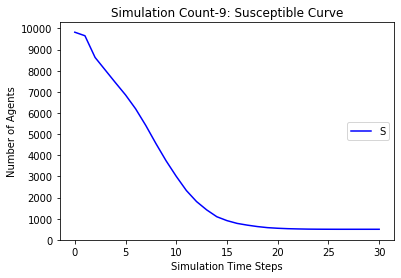

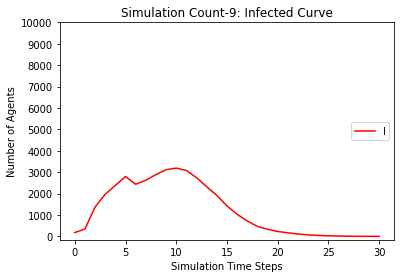

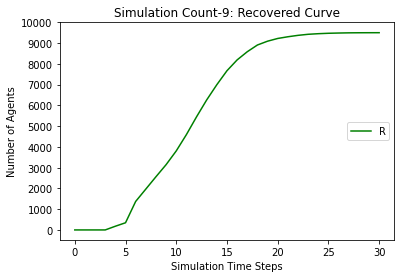

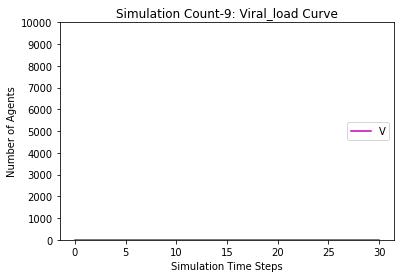

[9821, 9658, 8694, 8065, 7497, 6868, 6081, 5271, 4426, 3575, 2784, 2131, 1645, 1258, 995, 808, 671, 584, 538, 495, 484, 471, 465, 461, 459, 458, 457, 457, 457, 457, 457]
[179, 342, 1306, 1935, 2324, 2790, 2613, 2794, 3071, 3293, 3297, 3140, 2781, 2317, 1789, 1323, 974, 674, 457, 313, 187, 113, 73, 34, 25, 13, 8, 4, 2, 1, 0]
[0, 0, 0, 0, 179, 342, 1306, 1935, 2503, 3132, 3919, 4729, 5574, 6425, 7216, 7869, 8355, 8742, 9005, 9192, 9329, 9416, 9462, 9505, 9516, 9529, 9535, 9539, 9541, 9542, 9543]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9821, 9657, 8652, 8085, 7496, 6896, 6220, 5466, 4641, 3816, 3053, 2413, 1884, 1486, 1199, 992, 815, 703, 634, 582, 546, 527, 513, 506, 499, 495, 494, 493, 491, 489, 488, 488, 487, 487, 487, 482, 481, 481, 481, 481, 480, 478, 478, 478, 478, 478], [9821, 9638, 8597, 7956, 7365, 6731, 5952, 5121, 4283, 3488, 2754, 2106, 1575, 1206, 975,

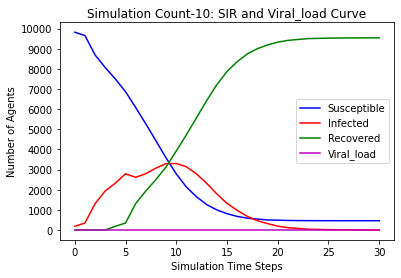

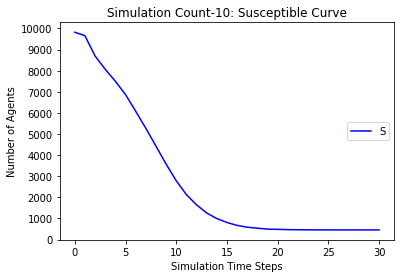

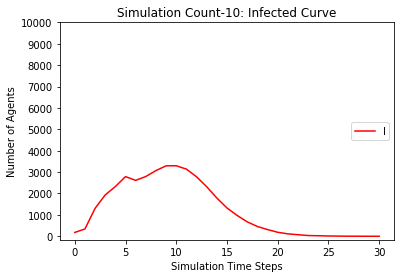

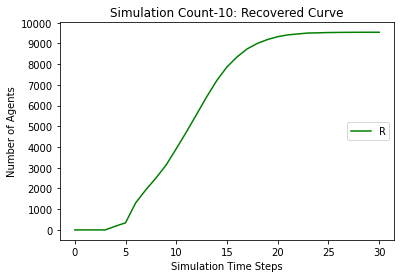

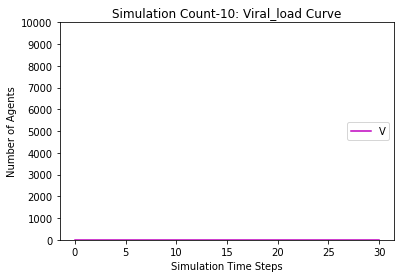

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  num_tests_p=NUM_TESTS
  num_tests_n=NUM_TESTS 
  Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n,num_tests_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1,num_tests_n)
    j+=1 
    Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  print(num_tests_n)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

Susceptible Average (100 Simulations): [9821, 9651.19921875, 8649.23046875, 8045.30859375, 7449.35546875, 6844.94921875, 6165.171875, 5388.55078125, 4542.921875, 3721.796875, 2975.02734375, 2299.82421875, 1761.75390625, 1359.984375, 1055.96875, 866.1328125, 737.171875, 656.2734375, 595.74609375, 550.34375, 521.16015625, 501.71484375, 489.44921875, 480.30078125, 475.6796875, 473.453125, 470.75390625, 470.2421875, 469.5234375, 469.203125, 469.01171875]
Infected Average(100 Simulations): [179, 348.80078125, 1350.76953125, 1954.69140625, 2371.64453125, 2806.25, 2484.05859375, 2656.7578125, 2906.43359375, 3123.15234375, 3190.14453125, 3088.7265625, 2781.16796875, 2361.8125, 1919.05859375, 1433.69140625, 1024.58203125, 703.7109375, 460.22265625, 315.7890625, 216.01171875, 154.55859375, 106.296875, 70.04296875, 45.48046875, 28.26171875, 18.6953125, 10.05859375, 6.15625, 4.25, 1.7421875]
Recovered Average(100 Simulations): [0, 0, 0, 0, 179, 348.80078125, 1350.76953125, 1954.69140625, 2550.6445

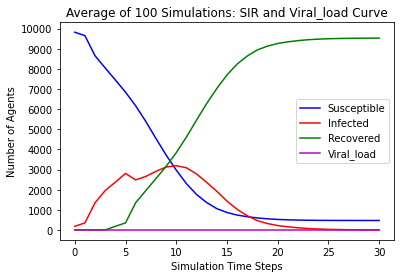

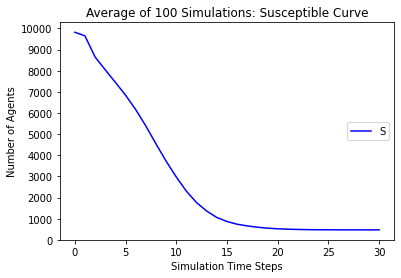

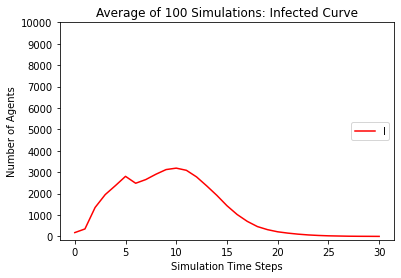

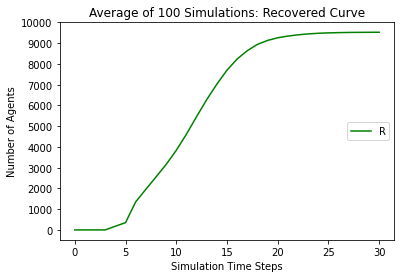

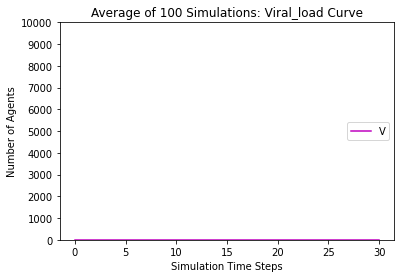

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
